Importo las librerias necesarias

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Creo un DataFrame a partir del archivo .csv

In [30]:
df = pd.read_csv('C:/Users/Tino/Documents/Documentos/Data/freeCodeCamp Data Analytics with Python/medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Defino la columna 'Sobrepeso' en base a si el indice de masa corporal (IMC=peso/(altura**2)) es mayor a 25

In [31]:
df['overweight'] = np.where((df['weight']/(df['height']/100)**2)>25,1,0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Notar que los valores de Glucosa pueden ser normales (0), por encima de lo normal (1) y muy altos (2)

In [32]:
df.value_counts(['gluc'])

gluc
1       59479
3        5331
2        5190
Name: count, dtype: int64

Lo mismo sucede para el Colesterol

In [33]:
df.value_counts(['cholesterol'])

cholesterol
1              52385
2               9549
3               8066
Name: count, dtype: int64

Simplifico los valores de Glucosa y Colesterol de forma que los valores normales sean 0 y el resto 1 

In [34]:
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)

Formateo los datos para poder graficarlos en base a presencia/ausencia de condición cardíaca

In [35]:
long_format = pd.melt(df, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight','smoke'],
                      var_name='variable', value_name='value')
long_format.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


Grafico los resultados de forma de mostrar la frecuencia de condiciones cualitativas (actividad fisica, alcoholismo, colesterol, glucosa, sobrepeso, fumador) para quienes tienen o no alguna condición cardíaca.

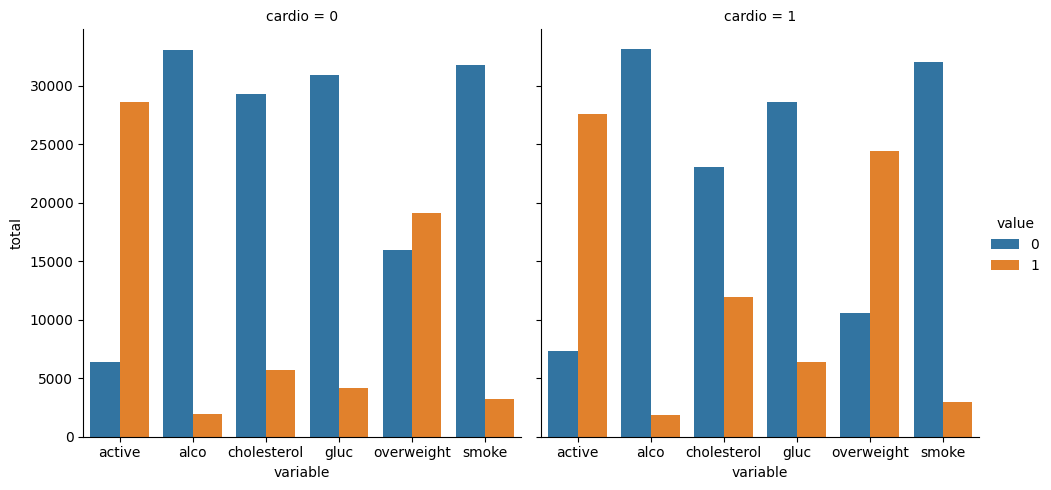

In [36]:
g = sns.catplot(x='variable', hue='value', col='cardio', data=long_format, kind='count')
g.set_axis_labels("variable", "total")
plt.show()

Se puede ver a simple vista que la proporción de individuos con colesterol alto y sobrepeso aumenta en la subpoblación de pacientes con alguna condición cardíaca, implicando una relación entre las variables.

En vistas de realizar un heatmap de correlación entre variables, limpio las "colas" de las distribuciones de peso y altura para no distorsionar el análisis.

Además, me aseguro que los datos de presión tengan sentido siendo la presión sistólica ('ap_hi') mayor a la diastólica ('ap_lo'). Filtro aquellos que no cumplan esa condición.

In [37]:
lower_bound = df['height'].quantile(0.025)
upper_bound = df['height'].quantile(0.975)
lower_bound2 = df['weight'].quantile(0.025)
upper_bound2 = df['weight'].quantile(0.975)

df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= lower_bound) &
    (df['height'] <= upper_bound) &
    (df['weight'] >= lower_bound2) &
    (df['weight'] <= upper_bound2)
    ]

Utilizando el DataFrame "curado" realizo la matriz de correlación

In [38]:
correlation_matrix = df_heat.corr()
print(correlation_matrix)

                   id       age       sex    height    weight     ap_hi  \
id           1.000000  0.002507  0.003426  0.000326  0.000149  0.003492   
age          0.002507  1.000000 -0.018132 -0.076932  0.070168  0.018689   
sex          0.003426 -0.018132  1.000000  0.505785  0.129979  0.005063   
height       0.000326 -0.076932  0.505785  1.000000  0.251503  0.004586   
weight       0.000149  0.070168  0.129979  0.251503  1.000000  0.027030   
ap_hi        0.003492  0.018689  0.005063  0.004586  0.027030  1.000000   
ap_lo        0.000484  0.153508  0.059947  0.017922  0.227922  0.072803   
cholesterol  0.003719  0.129996 -0.037605 -0.063522  0.135981  0.022807   
gluc         0.002289  0.086990 -0.021357 -0.030469  0.107072  0.011111   
smoke       -0.002732 -0.044371  0.337436  0.187830  0.056533 -0.001928   
alco        -0.000708 -0.026970  0.168637  0.089785  0.059917  0.000769   
active       0.005891 -0.011445  0.007864 -0.005661 -0.014430 -0.000222   
cardio       0.003900  0.

Grafico el heatmap, realizando enmascaramiento del lado especular derecho para no entorpecer la visualización

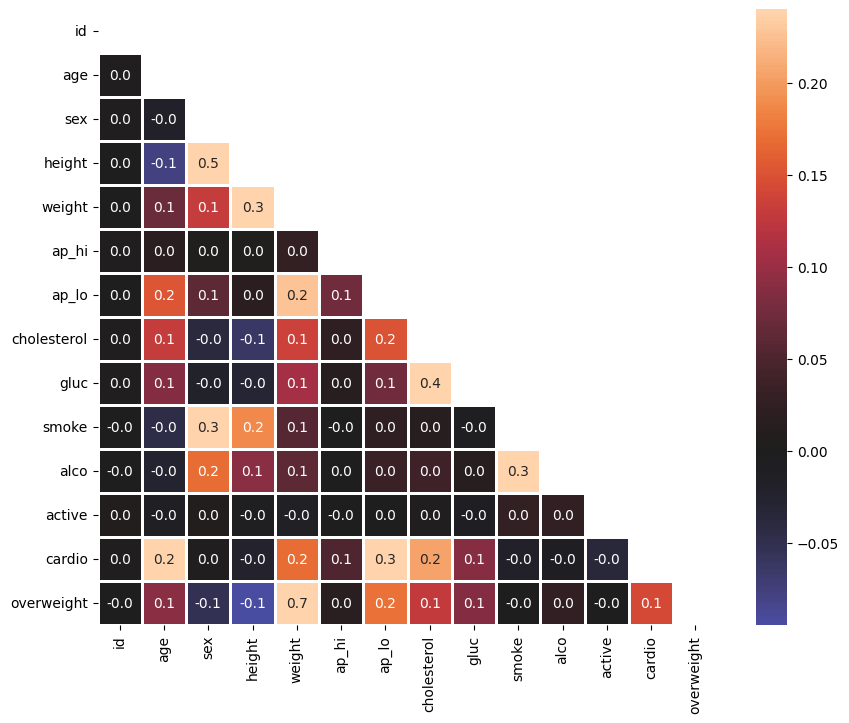

In [39]:
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, fmt=".1f", mask=mask, annot=True, linecolor='white', robust=True,
                linewidths='1', cmap='icefire', vmin=-0.095, vmax=0.24, center=0)
plt.show()

De esta manera podemos confirmar la correlación positiva entre la condición cardiológica y el colesterol y sobrepeso que habiamos observado previamente en el grafico de barras.

Por otro lado, destacamos la correlación positiva la condición cardiológica y la edad, el peso, la presión diastólica, el colesterol y la glucosa (todas variables cuantitativas no analizadas en el gráfico anterior).